In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.8 MB/s eta 0:00:00


## Loading environment and data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import nltk
import collections
import re
import math
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, layers, losses
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from scipy import spatial
import matplotlib.pyplot as plt

In [ ]:
!pip install spacy-sentence-bert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 28.6 MB/s eta 0:00:00
  Created wheel for spacy-sentence-bert: filename=spacy_sentence_bert-0.1.2-py3-none-any.whl size=27201 sha256=fb8dc0b0663ec4838957d5948f07a806d4919998ccda66083dda857c0f5d22b4
  Stored in directory: /root/.cache/pip/wheels/e9/3d/c9/a2e13b1a9dcaacca18d82bd7154ab95d1cea35d707c472a133
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=6e063b2689d9a09c63e936

In [ ]:
import spacy_sentence_bert
import spacy

In [ ]:
nlp = spacy_sentence_bert.load_model('en_stsb_roberta_large')

Downloading:   0%|          | 0.00/748 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/191 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/674 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
df_IMDB = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/IMDB Dataset.csv").iloc[:2000,:]
y_IMDB = np.asarray(df_IMDB.iloc[:,1])
y_IMDB[y_IMDB=="positive"] = 1
y_IMDB[y_IMDB=="negative"] = 0
y_IMDB = y_IMDB.reshape(-1,1).astype('float32')
X_IMDB = np.array([nlp(df_IMDB.iloc[i,0]).vector for i in range(df_IMDB.shape[0])])
X_train_IMDB, X_test_IMDB, y_train_IMDB, y_test_IMDB = train_test_split(X_IMDB, y_IMDB, test_size=0.95, random_state=123)
X_train_IMDB = np.array(X_train_IMDB)
X_test_IMDB = np.array(X_test_IMDB)
X_train_IMDB.shape

(100, 1024)

In [ ]:
y_train_IMDB = to_categorical(y_train_IMDB)
y_test_IMDB = to_categorical(y_test_IMDB)

In [ ]:
df_amazon = pd.read_csv("/content/drive/MyDrive/NLP_Projekt/amazon_test.csv", header=None, names=["sentiment", "title", "review"]).iloc[:2000,:]
y_amazon = np.asarray(df_amazon.iloc[:,0])
y_amazon[y_amazon==1] = 0
y_amazon[y_amazon==2] = 1
y_amazon = y_amazon.reshape(-1,1).astype('float32')
X_amazon = np.array([nlp(df_amazon.iloc[i,1] + ": " + df_amazon.iloc[i,2]).vector for i in range(df_amazon.shape[0])])
X_train_amazon, X_test_amazon, y_train_amazon, y_test_amazon = train_test_split(X_amazon, y_amazon, test_size=0.95, random_state=123)
X_train_amazon = np.array(X_train_amazon)
X_test_amazon = np.array(X_test_amazon)
X_train_amazon.shape

(100, 1024)

In [ ]:
y_train_amazon = to_categorical(y_train_amazon)
y_test_amazon = to_categorical(y_test_amazon)

## Learning IMDB based on IMDB

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Dropout(.2))
model.add(Dense(256))
model.add(Dropout(.2))
model.add(Dense(128))
model.add(Dropout(.2))
model.add(Dense(64))
model.add(Dense(2, activation=tf.keras.activations.softmax))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_IMDB, y_train_IMDB, epochs=10, batch_size=64)

Epoch 1/10
2/2 [==============================] - 1s 8ms/step - loss: 1.4717 - accuracy: 0.5100
Epoch 2/10
2/2 [==============================] - 0s 8ms/step - loss: 1.2135 - accuracy: 0.6000
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 0.9235 - accuracy: 0.7200
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7429 - accuracy: 0.7500
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 0.5283 - accuracy: 0.8500
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 0.6123 - accuracy: 0.7500
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4649 - accuracy: 0.9000
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 0.3881 - accuracy: 0.9200
Epoch 9/10
2/2 [==============================] - 0s 5ms/step - loss: 0.3280 - accuracy: 0.9000
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 0.3576 - accuracy: 0.8700


In [ ]:
y_test_IMDB_hat = model.predict(X_test_IMDB)
np.mean(np.array([np.argmax(y_i) for y_i in y_test_IMDB_hat]) == np.array([np.argmax(y_i) for y_i in y_test_IMDB]))

60/60 [==============================] - 0s 2ms/step


0.7884210526315789

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Dropout(.2))
model.add(Dense(256))
model.add(Dropout(.2))
model.add(Dense(128))
model.add(Dropout(.2))
model.add(Dense(64))
model.add(Dense(2, activation=tf.keras.activations.softmax))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_test_IMDB, y_test_IMDB, epochs=15, batch_size=64)

Epoch 1/15
30/30 [==============================] - 1s 4ms/step - loss: 0.7470 - accuracy: 0.7258
Epoch 2/15
30/30 [==============================] - 0s 4ms/step - loss: 0.5552 - accuracy: 0.8047
Epoch 3/15
30/30 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.8132
Epoch 4/15
30/30 [==============================] - 0s 3ms/step - loss: 0.4507 - accuracy: 0.8232
Epoch 5/15
30/30 [==============================] - 0s 4ms/step - loss: 0.4267 - accuracy: 0.8289
Epoch 6/15
30/30 [==============================] - 0s 4ms/step - loss: 0.4064 - accuracy: 0.8332
Epoch 7/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8463
Epoch 8/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.8358
Epoch 9/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8432
Epoch 10/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3604 - accuracy: 0.8579
Epoch 11/15
30/30 [

In [ ]:
y_train_IMDB_hat = model.predict(X_train_IMDB)
np.mean(np.array([np.argmax(y_i) for y_i in y_train_IMDB_hat]) == np.array([np.argmax(y_i) for y_i in y_train_IMDB]))

4/4 [==============================] - 0s 4ms/step


0.87

Training on 100, testing on 1900: 0.779 accuracy

Training on 1900, testing on 100: 0.850 accuracy

## Learning amazon based on amazon

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Dropout(.2))
model.add(Dense(256))
model.add(Dropout(.2))
model.add(Dense(128))
model.add(Dropout(.2))
model.add(Dense(64))
model.add(Dense(2, activation=tf.keras.activations.softmax))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_amazon, y_train_amazon, epochs=10, batch_size=64)

Epoch 1/10
2/2 [==============================] - 1s 9ms/step - loss: 1.5061 - accuracy: 0.4300
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 1.0859 - accuracy: 0.6000
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 0.8124 - accuracy: 0.7200
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 0.7048 - accuracy: 0.7600
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 0.5074 - accuracy: 0.8400
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 0.4488 - accuracy: 0.8300
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4844 - accuracy: 0.8200
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 0.4400 - accuracy: 0.8700
Epoch 9/10
2/2 [==============================] - 0s 6ms/step - loss: 0.4180 - accuracy: 0.8600
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.3496 - accuracy: 0.8600


In [ ]:
y_test_amazon_hat = model.predict(X_test_amazon)
np.mean(np.array([np.argmax(y_i) for y_i in y_test_amazon_hat]) == np.array([np.argmax(y_i) for y_i in y_test_amazon]))

60/60 [==============================] - 0s 1ms/step


0.8689473684210526

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Dropout(.2))
model.add(Dense(256))
model.add(Dropout(.2))
model.add(Dense(128))
model.add(Dropout(.2))
model.add(Dense(64))
model.add(Dense(2, activation=tf.keras.activations.softmax))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_test_amazon, y_test_amazon, epochs=15, batch_size=64)

Epoch 1/15
30/30 [==============================] - 1s 4ms/step - loss: 0.5808 - accuracy: 0.8142
Epoch 2/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3549 - accuracy: 0.8921
Epoch 3/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3216 - accuracy: 0.8921
Epoch 4/15
30/30 [==============================] - 0s 4ms/step - loss: 0.2907 - accuracy: 0.9058
Epoch 5/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2713 - accuracy: 0.9084
Epoch 6/15
30/30 [==============================] - 0s 4ms/step - loss: 0.2715 - accuracy: 0.9053
Epoch 7/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.9100
Epoch 8/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.9158
Epoch 9/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2373 - accuracy: 0.9221
Epoch 10/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9221
Epoch 11/15
30/30 [

In [ ]:
y_train_amazon_hat = model.predict(X_train_amazon)
np.mean(np.array([np.argmax(y_i) for y_i in y_train_amazon_hat]) == np.array([np.argmax(y_i) for y_i in y_train_amazon]))

4/4 [==============================] - 0s 3ms/step


0.88

Training on 100, testing on 1900: 0.858 accuracy

Training on 1900, testing on 100: 0.890 accuracy

## Learning IMDB based on Amazon

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Dropout(.2))
model.add(Dense(256))
model.add(Dropout(.2))
model.add(Dense(128))
model.add(Dropout(.2))
model.add(Dense(64))
model.add(Dense(2, activation=tf.keras.activations.softmax))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_test_amazon, y_test_amazon, epochs=15, batch_size=64)

Epoch 1/15
30/30 [==============================] - 1s 3ms/step - loss: 0.6616 - accuracy: 0.7795
Epoch 2/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8811
Epoch 3/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3501 - accuracy: 0.8868
Epoch 4/15
30/30 [==============================] - 0s 4ms/step - loss: 0.3088 - accuracy: 0.9005
Epoch 5/15
30/30 [==============================] - 0s 4ms/step - loss: 0.2950 - accuracy: 0.8953
Epoch 6/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2813 - accuracy: 0.8995
Epoch 7/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.8984
Epoch 8/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2492 - accuracy: 0.9242
Epoch 9/15
30/30 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.9095
Epoch 10/15
30/30 [==============================] - 0s 3ms/step - loss: 0.2364 - accuracy: 0.9132
Epoch 11/15
30/30 [

In [ ]:
imbd_based_on_amazon_acc = []
y_hat = model.predict(X_test_IMDB)
imbd_based_on_amazon_acc.append(np.mean(np.array([np.argmax(y_i) for y_i in y_hat]) == np.array([np.argmax(y_i) for y_i in y_test_IMDB])))
for i in range(10):
    model.fit(X_train_IMDB, y_train_IMDB, epochs=1, batch_size=64)
    y_hat = model.predict(X_test_IMDB)
    imbd_based_on_amazon_acc.append(np.mean(np.array([np.argmax(y_i) for y_i in y_hat]) == np.array([np.argmax(y_i) for y_i in y_test_IMDB])))

60/60 [==============================] - 0s 2ms/step


In [ ]:
imbd_based_on_amazon_acc

[0.8157894736842105,
 0.8131578947368421,
 0.8105263157894737,
 0.8084210526315789,
 0.8026315789473685,
 0.8063157894736842,
 0.8063157894736842,
 0.8105263157894737,
 0.8089473684210526,
 0.8057894736842105,
 0.8073684210526316]

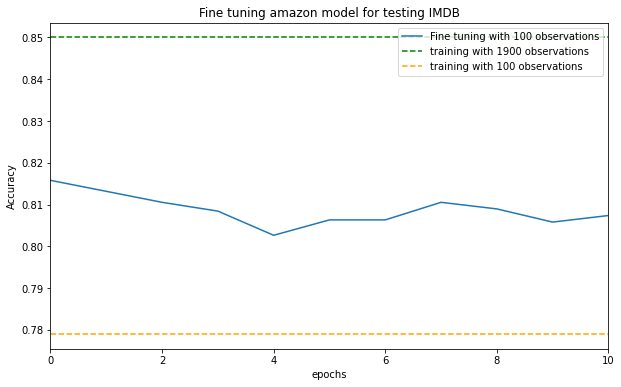

In [ ]:
plt.figure(figsize=(10,6))
plt.hlines([0.850], -1, 11, colors=['green'], linestyles='dashed')
plt.plot(np.arange(len(imbd_based_on_amazon_acc)), imbd_based_on_amazon_acc)
plt.hlines([0.779], -1, 11, colors=['orange'], linestyles='dashed')
plt.xlim([0,10])
plt.legend(["Fine tuning with 100 observations","training with 1900 observations","training with 100 observations"])
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Fine tuning amazon model for testing IMDB")
plt.show()

In [ ]:
model.save("IMDb_to_amazon_transfer_model")

## Learining amazon based on IMDB

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(1024,)))
model.add(Dropout(.2))
model.add(Dense(256))
model.add(Dropout(.2))
model.add(Dense(128))
model.add(Dropout(.2))
model.add(Dense(64))
model.add(Dense(2, activation=tf.keras.activations.softmax))

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_test_IMDB, y_test_IMDB, epochs=15, batch_size=64)

Epoch 1/15
30/30 [==============================] - 1s 3ms/step - loss: 0.8195 - accuracy: 0.7247
Epoch 2/15
30/30 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.8058
Epoch 3/15
30/30 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.8158
Epoch 4/15
30/30 [==============================] - 0s 3ms/step - loss: 0.4636 - accuracy: 0.8268
Epoch 5/15
30/30 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.8311
Epoch 6/15
30/30 [==============================] - 0s 3ms/step - loss: 0.4327 - accuracy: 0.8221
Epoch 7/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3937 - accuracy: 0.8458
Epoch 8/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3919 - accuracy: 0.8347
Epoch 9/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3849 - accuracy: 0.8453
Epoch 10/15
30/30 [==============================] - 0s 3ms/step - loss: 0.3587 - accuracy: 0.8584
Epoch 11/15
30/30 [

In [ ]:
amazon_based_on_imdb_acc = []
y_hat = model.predict(X_test_amazon)
amazon_based_on_imdb_acc.append(np.mean(np.array([np.argmax(y_i) for y_i in y_hat]) == np.array([np.argmax(y_i) for y_i in y_test_amazon])))
for i in range(10):
    model.fit(X_train_amazon, y_train_amazon, epochs=1, batch_size=64)
    y_hat = model.predict(X_test_amazon)
    amazon_based_on_imdb_acc.append(np.mean(np.array([np.argmax(y_i) for y_i in y_hat]) == np.array([np.argmax(y_i) for y_i in y_test_amazon])))

60/60 [==============================] - 0s 1ms/step


In [ ]:
amazon_based_on_imdb_acc

[0.8921052631578947,
 0.8942105263157895,
 0.8905263157894737,
 0.888421052631579,
 0.8842105263157894,
 0.8794736842105263,
 0.8789473684210526,
 0.8789473684210526,
 0.8757894736842106,
 0.8736842105263158,
 0.8736842105263158]

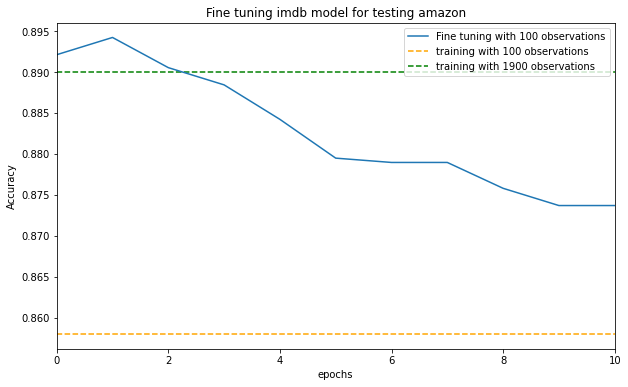

In [ ]:
plt.figure(figsize=(10,6))
plt.hlines([0.858], -1, 11, colors=['orange'], linestyles='dashed')
plt.plot(np.arange(len(amazon_based_on_imdb_acc)), amazon_based_on_imdb_acc)
plt.hlines([0.89], -1, 11, colors=['green'], linestyles='dashed')
plt.xlim([0,10])
plt.legend(["Fine tuning with 100 observations","training with 100 observations","training with 1900 observations"])
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.title("Fine tuning imdb model for testing amazon")
plt.show()

In [ ]:
model.save("amazon_to_IMDb_transfer_model")

In [ ]:
import os

In [ ]:
os.system( "zip -r {} {}".format( "amazon_to_IMDb_transfer_model.zip" , "amazon_to_IMDb_transfer_model" ) )

0

In [ ]:
os.system( "zip -r {} {}".format( "IMDb_to_amazon_transfer_model.zip" , "IMDb_to_amazon_transfer_model" ) )

0

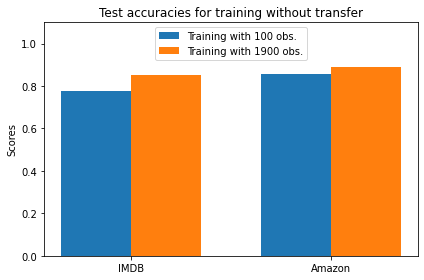

In [ ]:
labels = ['IMDB', 'Amazon']
acc_means = [np.mean([0.789, 0.77, 0.772, 0.757]), np.mean([0.7747777777777778, 0.777, 0.7574444444444445, 0.7704444444444445]), np.mean([0.777, 0.78, 0.761, 0.758])]
f1_means = [np.mean([0.8011310084825636, 0.7762645914396886, 0.772, 0.7772685609532537]), np.mean([0.7787359458574391, 0.7797168258149489, 0.749856766357282, 0.7840267614467907]), np.mean([0.7913938260056127, 0.7868217054263567, 0.7578520770010132, 0.7791970802919709])]

acc_100 = [0.779, 0.858]
acc_1900 = [0.85, 0.89]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc_100, width, label='Training with 100 obs.')
rects2 = ax.bar(x + width/2, acc_1900, width, label='Training with 1900 obs.')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Test accuracies for training without transfer')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim([0,1.1])
ax.legend(loc=9)

fig.tight_layout()

plt.show()